<a href="https://colab.research.google.com/github/mathiasklein1324/injury_performance_classification/blob/main/collegiate_athlete_injury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏟️ Collegiate Athlete Injury Prediction

**Disciplina:** Machine Learning para Ciência de Dados – Mestrado  
**Grupo:** 3 integrantes  
**Autores:** Bianca, Gabriel e Mathias

---

## 🔍 Descrição do Trabalho
Este trabalho tem como objetivo aplicar técnicas de **Machine Learning** para prever lesões em atletas universitários, utilizando dados de desempenho físico, carga de treinamento e métricas de recuperação. O estudo integra **engenharia de features**, **análise exploratória de dados**, e **modelagem preditiva** com ênfase em **interpretabilidade e acurácia**.


## Bibliotecas

In [ ]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import warnings

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import plotly.express as px
import plotly.graph_objects as go

# Estatística
from scipy.stats import ttest_ind, chi2_contingency

# Machine Learning - Pré-processamento e Modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Machine Learning - Métricas
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# Configurações de warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Dataset

In [ ]:
# Leitura do arquivo CSV em um DataFrame
df = pd.read_csv('collegiate_athlete_injury_dataset.csv')

# Visualizar as primeiras linhas do DataFrame
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


### Análises Iniciais

In [ ]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [ ]:
# Verificar valores nulos em cada coluna
df.isnull().sum()

,0
Athlete_ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
Position,0
Training_Intensity,0
Training_Hours_Per_Week,0
Recovery_Days_Per_Week,0
Match_Count_Per_Week,0


In [ ]:
# Identificar quantidade de usuários duplicados pelo user_id
df[df.duplicated(['Athlete_ID'], keep=False)]

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator


In [ ]:
# Estatísticas descritivas do DataFrame
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


In [ ]:
# Renomear colunas para facilitar o acesso
df.rename(columns={
    'Athlete_ID': 'athlete_id',
    'Age': 'age',
    'Gender': 'gender',
    'Height_cm': 'height_cm',
    'Weight_kg': 'weight_kg',
    'Position': 'position',
    'Training_Intensity': 'training_intensity',
    'Training_Hours_Per_Week': 'training_hours_per_week',
    'Recovery_Days_Per_Week': 'recovery_days_per_week',
    'Match_Count_Per_Week': 'match_count_per_week',
    'Rest_Between_Events_Days': 'rest_between_events_days',
    'Fatigue_Score': 'fatigue_score',
    'Performance_Score': 'performance_score',
    'Team_Contribution_Score': 'team_contribution_score',
    'Load_Balance_Score': 'load_balance_score',
    'ACL_Risk_Score': 'acl_risk_score',
    'Injury_Indicator': 'injury_indicator'
}, inplace=True)

### Criação de novas variáveis

In [ ]:
# Criando variáveis derivadas
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
df['training_load'] = df['training_intensity'] * df['training_hours_per_week']
df['load_rest_ratio'] = df['training_load'] / np.where(df['recovery_days_per_week'] < 1, 1, df['recovery_days_per_week'])
df['load_rest_ratio'] = np.where(df['load_rest_ratio'] >= 100, 100, df['load_rest_ratio'])  # limitar a 100 (cap)
df['log_load_rest_ratio'] = np.log(df['load_rest_ratio'] + 1)  # +1 para evitar log(0)

# Categorizando load_rest_ratio em faixas (Baixa, Moderada, Alta) usando tercis
df['load_rest_ratio_categorical'] = pd.qcut(df['load_rest_ratio'], q=3, labels=["Baixa", "Moderada", "Alta"])

Novas variáveis:

- bmi: índice de massa corporal (peso/altura²).

- training_load: carga total de treino semanal (intensidade × horas).

- load_rest_ratio: equilíbrio entre carga e recuperação (quanto maior, mais sobrecarga).

- load_rest_ratio (cap): limita a razão em 100 para evitar outliers.

- log_load_rest_ratio: versão logarítmica para reduzir assimetria dos dados.

### Limpeza e separação do dataset

In [ ]:
# Criando um subset para análise exploratória
df_eda = df.drop(columns=['height_cm', 'weight_kg', 'athlete_id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   athlete_id                   200 non-null    object  
 1   age                          200 non-null    int64   
 2   gender                       200 non-null    object  
 3   height_cm                    200 non-null    int64   
 4   weight_kg                    200 non-null    int64   
 5   position                     200 non-null    object  
 6   training_intensity           200 non-null    int64   
 7   training_hours_per_week      200 non-null    int64   
 8   recovery_days_per_week       200 non-null    int64   
 9   match_count_per_week         200 non-null    int64   
 10  rest_between_events_days     200 non-null    int64   
 11  fatigue_score                200 non-null    int64   
 12  performance_score            200 non-null    int64   
 13  team_

In [ ]:
# Variáveis numéricas
numerical_features = [
    "age",
    "height_cm",
    "weight_kg",
    "bmi",
    "training_intensity",
    "training_hours_per_week",
    "training_load",
    "recovery_days_per_week",
    "match_count_per_week",
    "rest_between_events_days",
    "load_balance_score",
    "acl_risk_score",
    "fatigue_score",
    "performance_score",
    "team_contribution_score",
    "load_rest_ratio",
    "log_load_rest_ratio"
]

# Variáveis categóricas
categorical_features = [
    "gender",
    "position",
    "load_rest_ratio_categorical"
]

# Variável alvo
target = ["injury_indicator"]

print("Numéricas:", numerical_features)
print("Categóricas:", categorical_features)
print("Alvo:", target)

Numéricas: ['age', 'height_cm', 'weight_kg', 'bmi', 'training_intensity', 'training_hours_per_week', 'training_load', 'recovery_days_per_week', 'match_count_per_week', 'rest_between_events_days', 'load_balance_score', 'acl_risk_score', 'fatigue_score', 'performance_score', 'team_contribution_score', 'load_rest_ratio', 'log_load_rest_ratio']
Categóricas: ['gender', 'position', 'load_rest_ratio_categorical']
Alvo: ['injury_indicator']


## Análise Exploratória

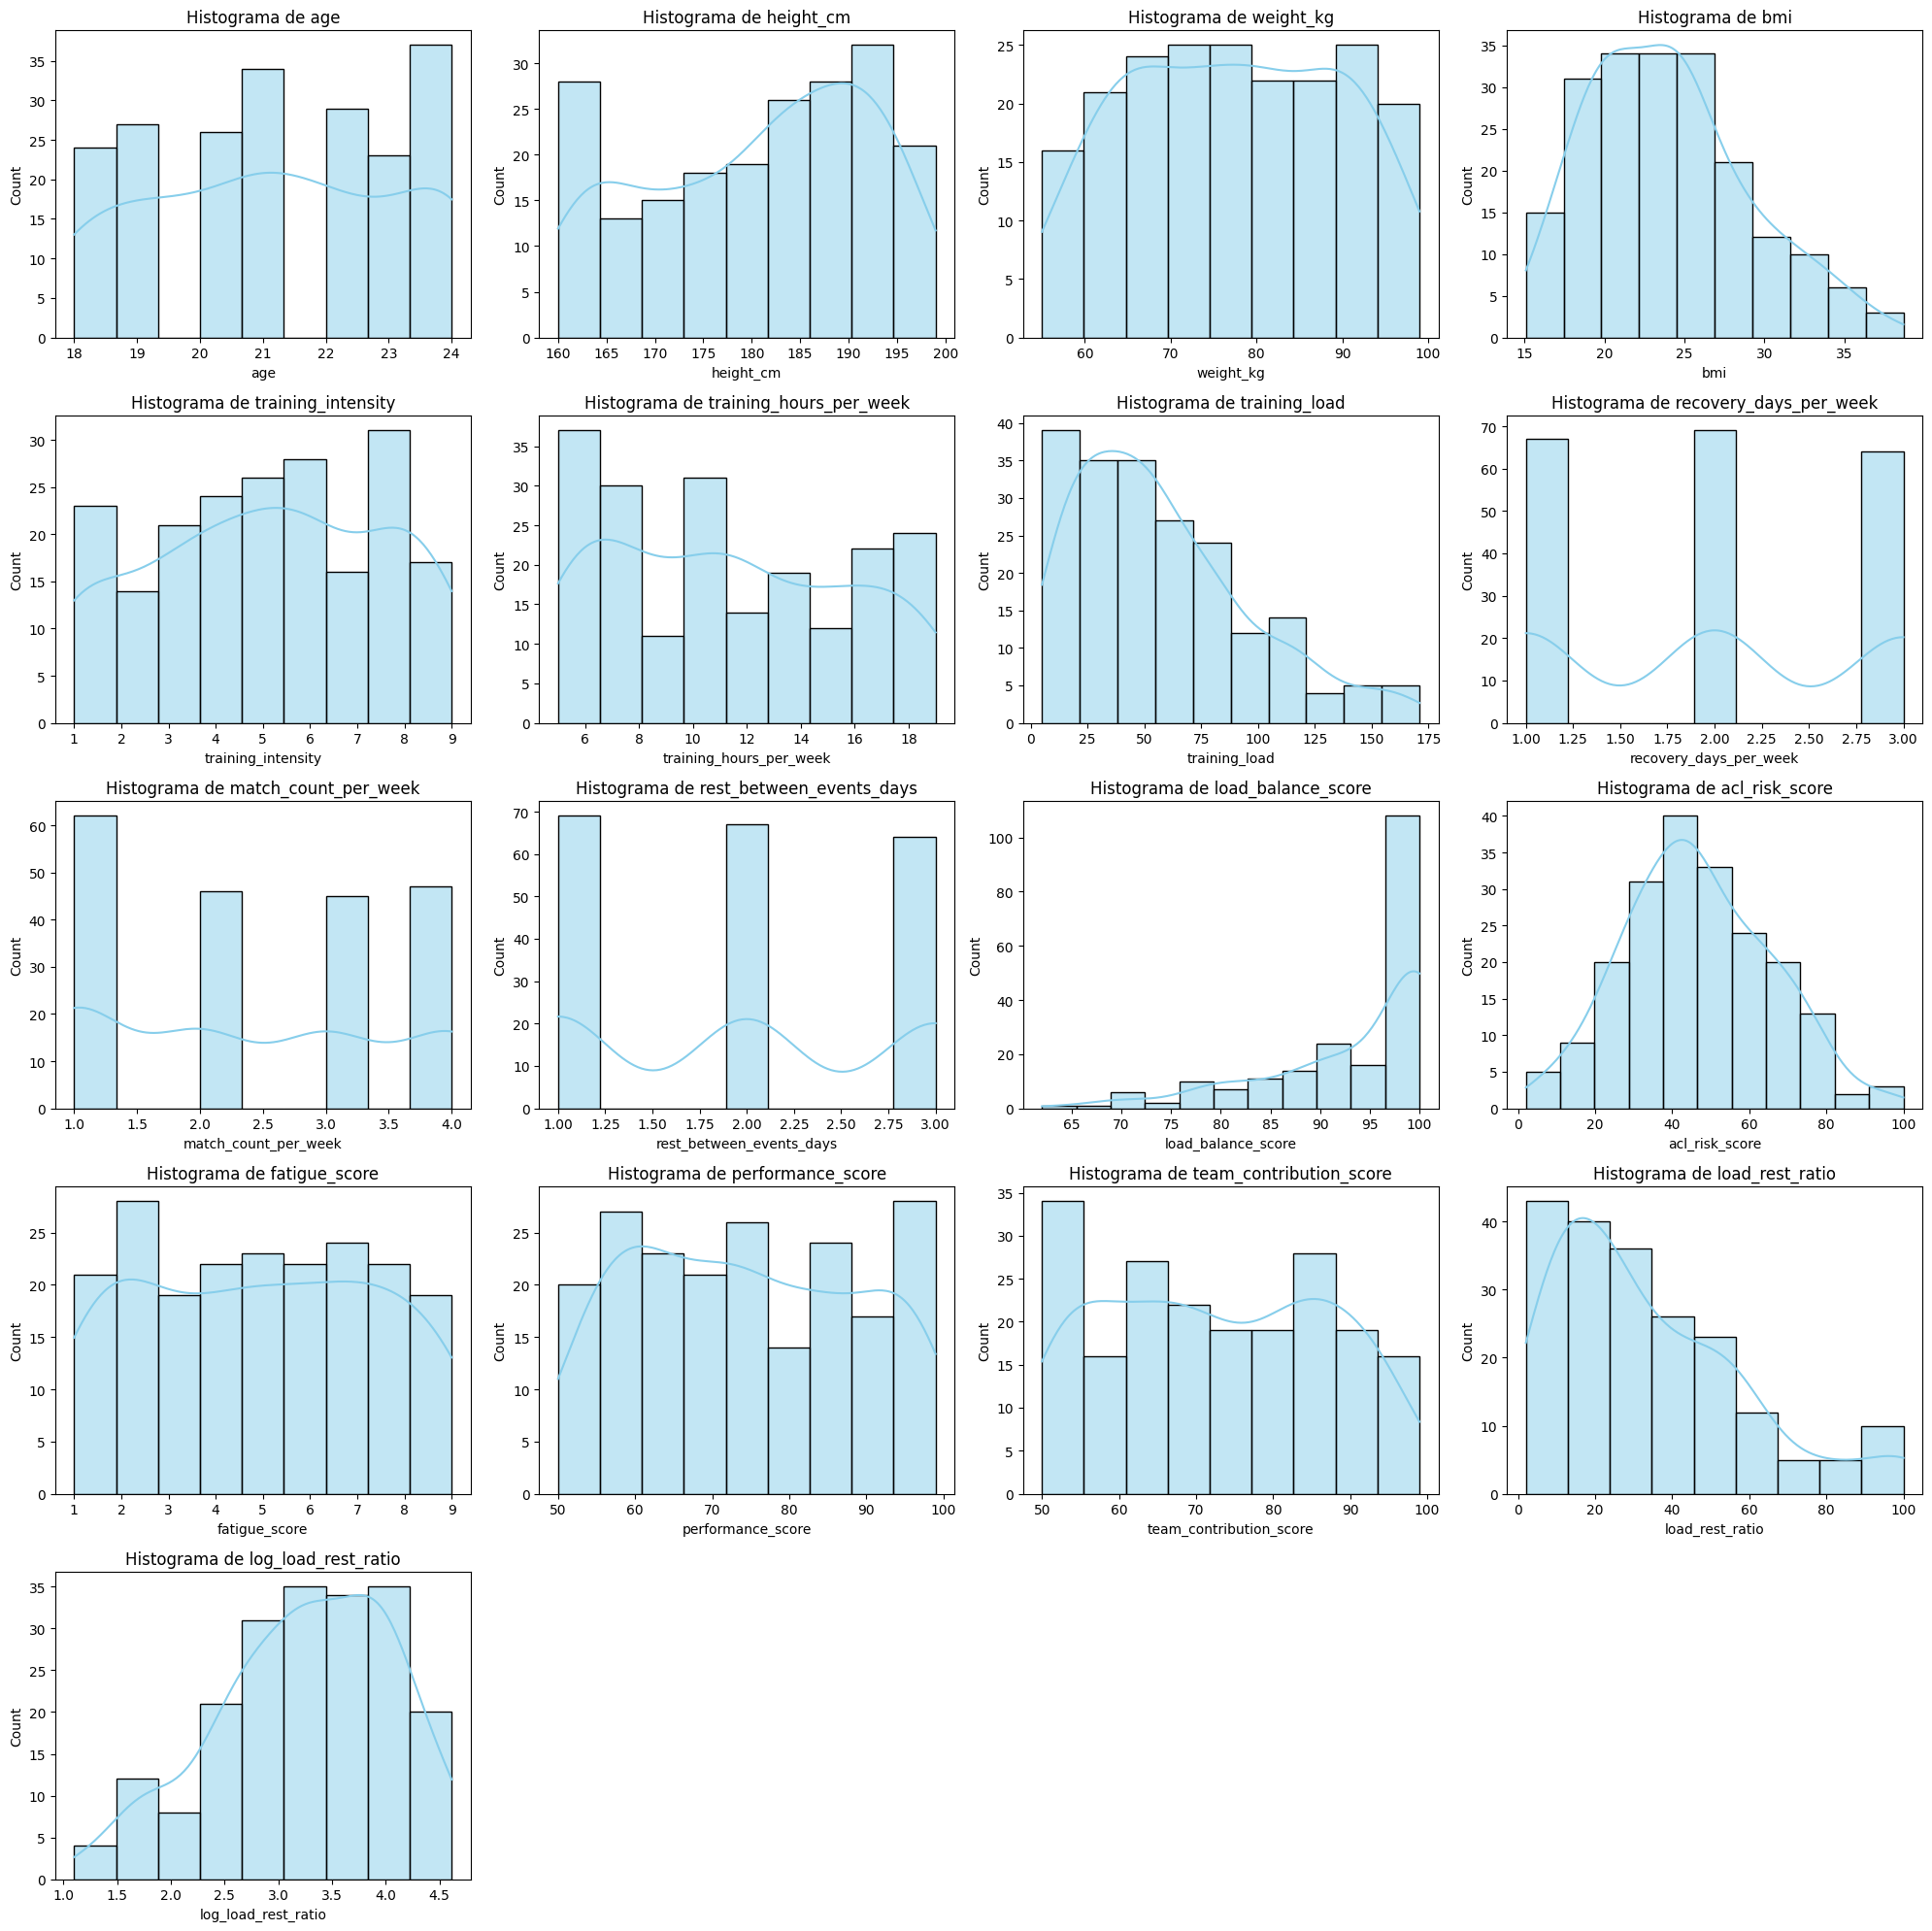

In [ ]:
# Define o tamanho da figura
n_cols = 4  # quantas colunas de subplots
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Cria histogramas para cada variável
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')

# Remove subplots extras, se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

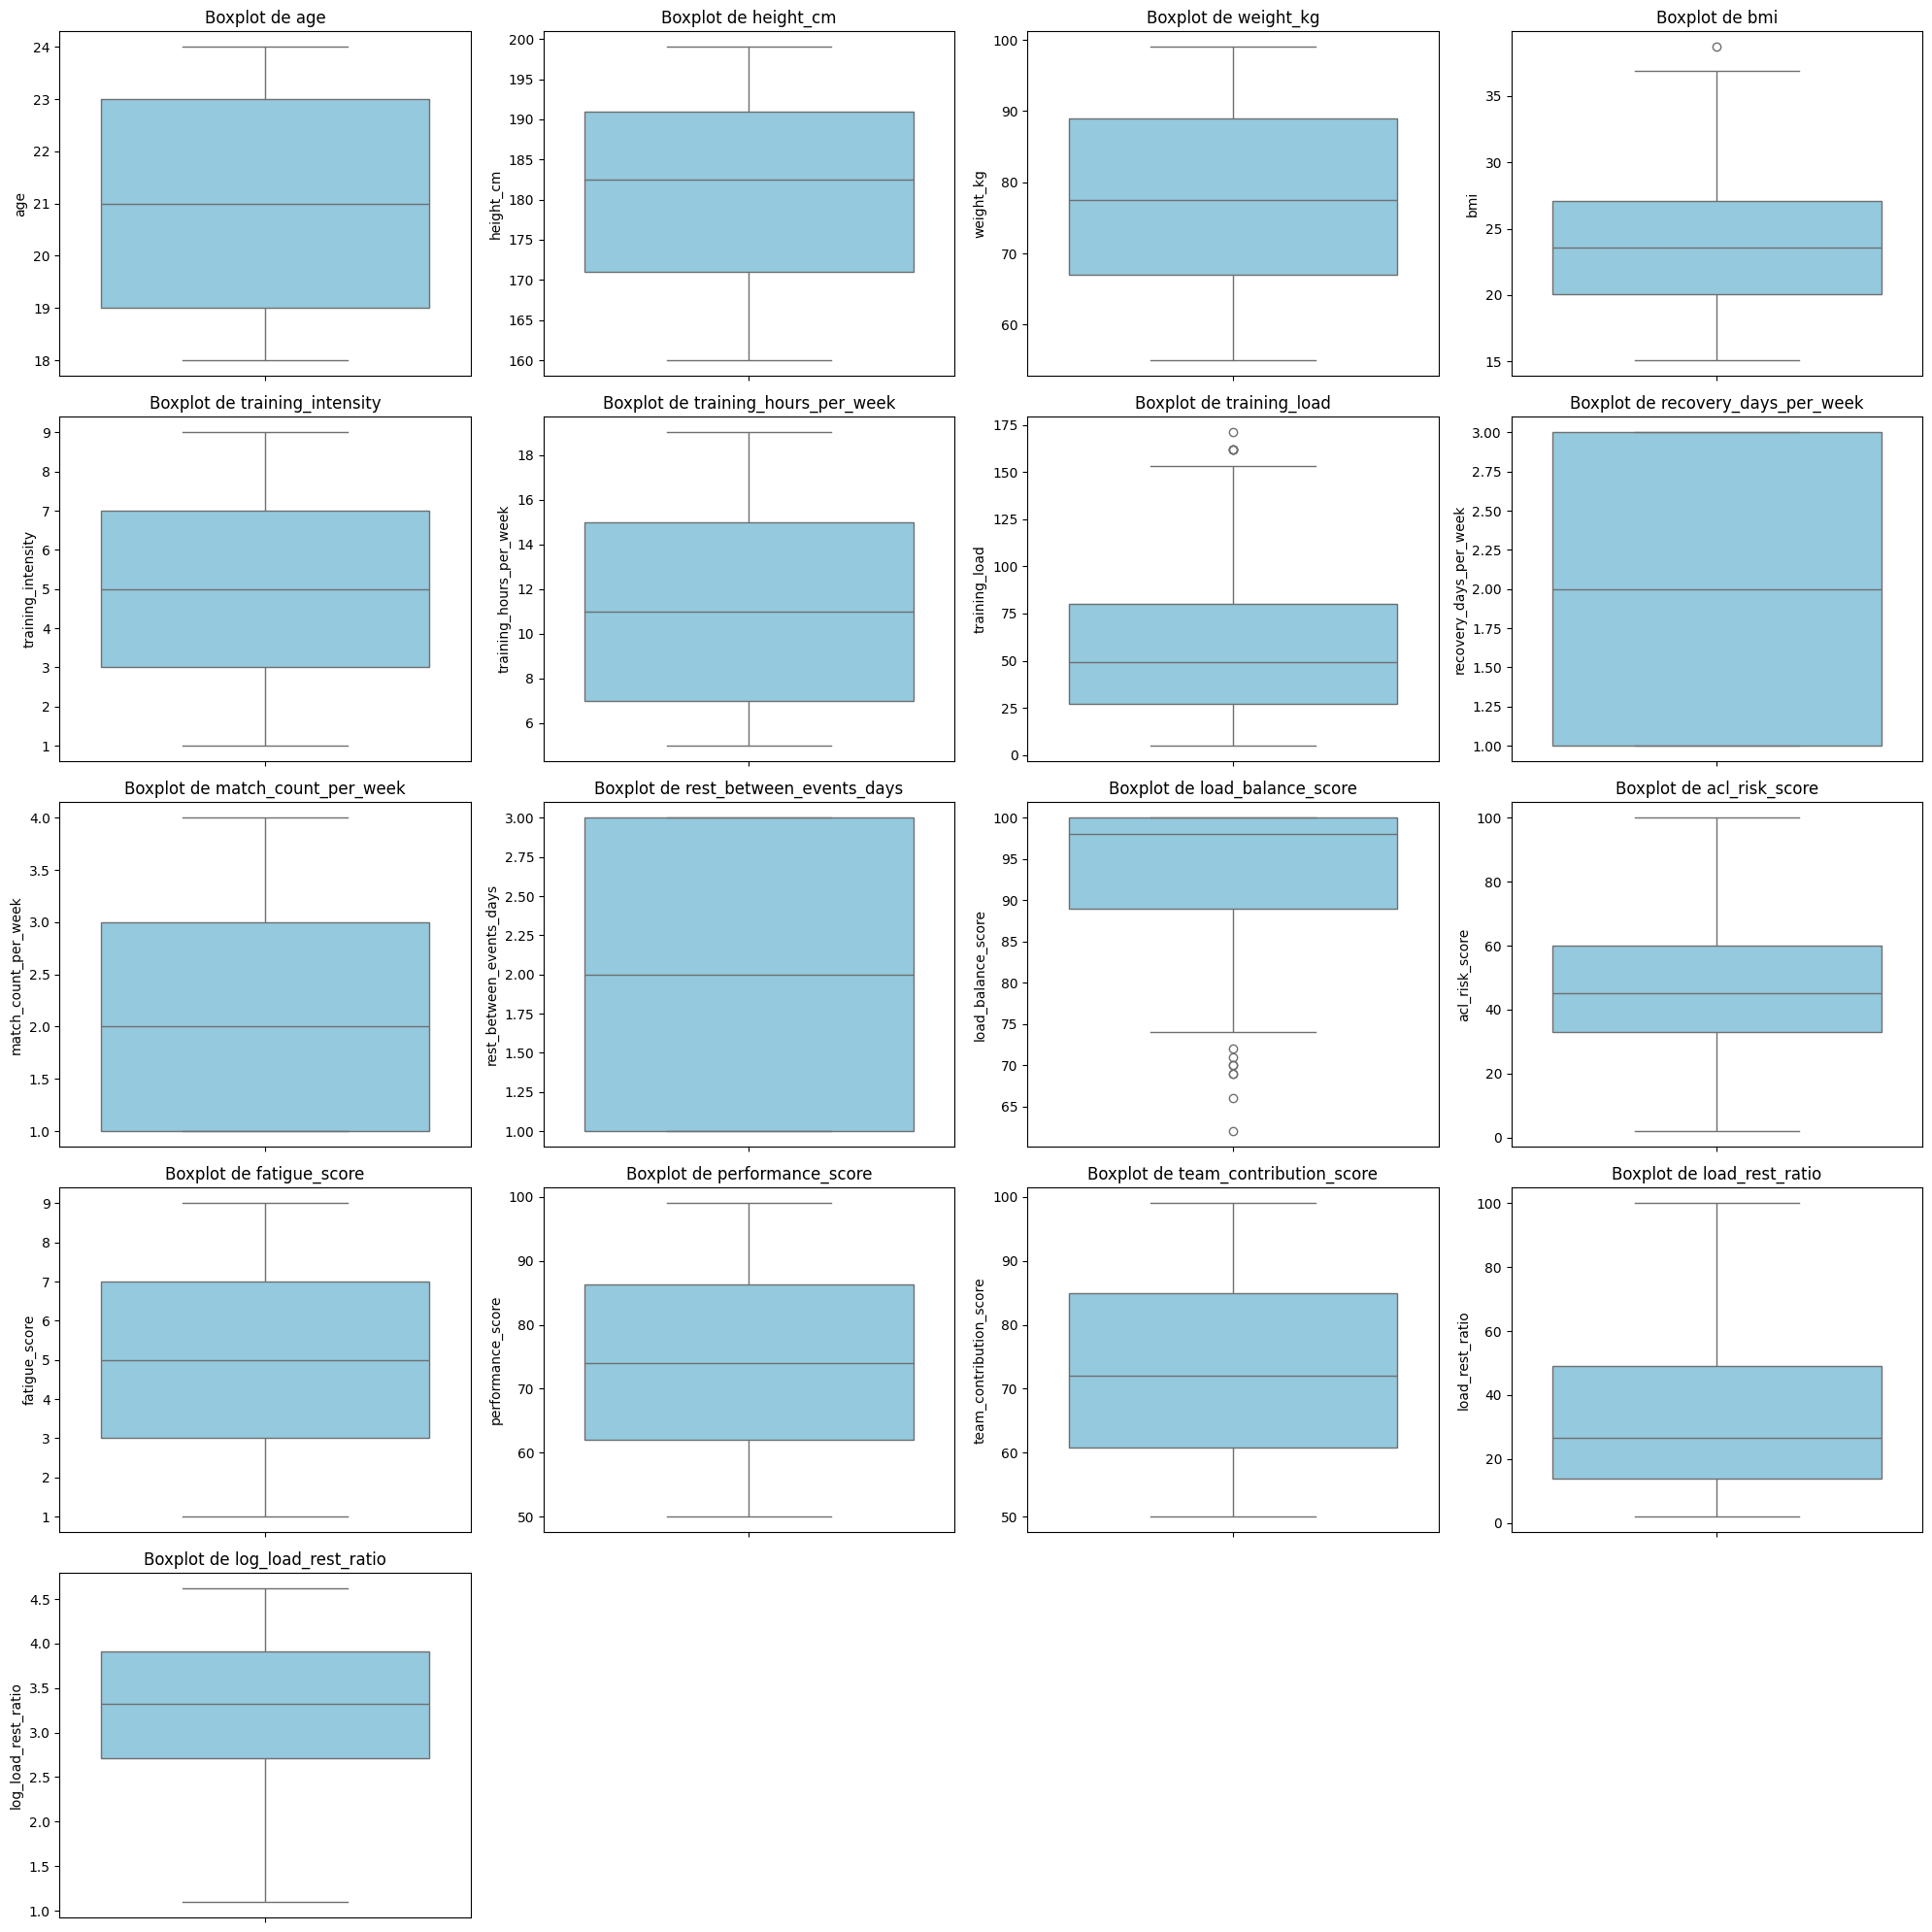

In [ ]:
# Define o tamanho da figura
n_cols = 4  # quantas colunas de subplots
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # calcula linhas necessárias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Cria boxplots para cada variável
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {col}')

# Remove subplots extras, se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Criar nova variável categórica com base em injury_indicator
df['injury_category'] = df['injury_indicator'].apply(lambda x: 'Injured' if x == 1 else 'Not Injured')

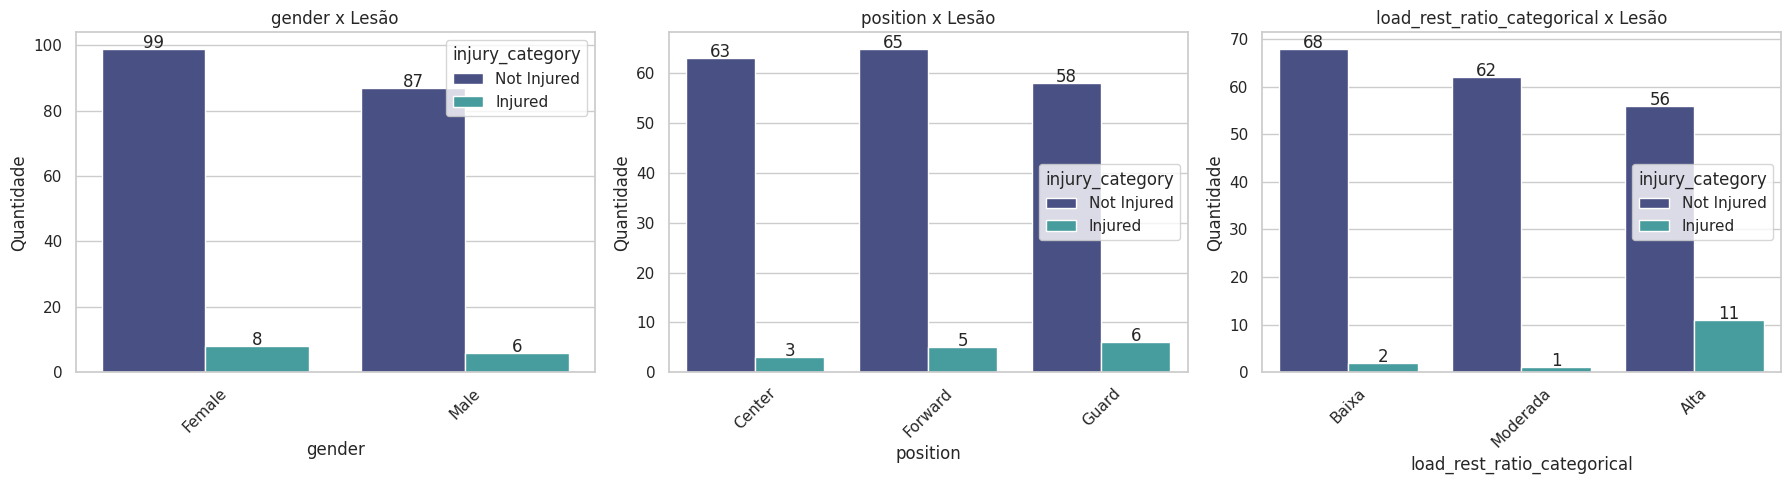

In [ ]:
sns.set(style="whitegrid")
features = categorical_features  # lista de variáveis categóricas

n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = sns.countplot(
        x=col,
        hue='injury_category',
        data=df,
        palette='mako',
        ax=axes[i]
    )

    # Adiciona valores absolutos em cima das barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.2,
                s=int(height),
                ha='center'
            )

    axes[i].set_title(f"{col} x Lesão")
    axes[i].set_ylabel("Quantidade")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Correlações

In [ ]:
results = []

# Variáveis contínuas
for col in numerical_features:
    grupo_sim = df[df[target[0]] == 1][col]
    grupo_nao = df[df[target[0]] == 0][col]
    t_stat, p_value = ttest_ind(grupo_sim, grupo_nao, nan_policy='omit')

    mean_sim = round(grupo_sim.mean(), 2)
    mean_nao = round(grupo_nao.mean(), 2)

    # Associação significativa
    correlation = 'Sim' if p_value < 0.05 else 'Não'

    # Direção do efeito
    if p_value < 0.05:
        direction = '↑ maior entre lesionados' if mean_sim > mean_nao else '↓ menor entre lesionados'
    else:
        direction = 'Sem diferença significativa'

    results.append({
        'Variável': col,
        'Tipo': 'Numérica',
        'Estatística': round(t_stat, 3),
        'p-valor': round(p_value, 3),
        'Média lesão': mean_sim,
        'Média sem lesão': mean_nao,
        'Associação significativa?': correlation,
        'Direção do efeito': direction
    })

# Variáveis categóricas
for col in categorical_features:
    ct = pd.crosstab(df[col], df[target[0]])
    chi2, p, dof, ex = chi2_contingency(ct)

    correlation = 'Sim' if p < 0.05 else 'Não'

    results.append({
        'Variável': col,
        'Tipo': 'Categórica',
        'Estatística': round(chi2, 3),
        'p-valor': round(p, 3),
        'Média lesão': None,
        'Média sem lesão': None,
        'Associação significativa?': correlation,
        'Direção do efeito': None
    })

# Transformar em DataFrame e ordenar por p-valor
results_df = pd.DataFrame(results).sort_values('p-valor').reset_index(drop=True)
results_df

,Variável,Tipo,Estatística,p-valor,Média lesão,Média sem lesão,Associação significativa?,Direção do efeito
0,recovery_days_per_week,Numérica,-3.809,0.000,1.21,2.04,Sim,↓ menor entre lesionados
1,load_rest_ratio,Numérica,5.265,0.000,65.60,31.32,Sim,↑ maior entre lesionados
2,load_balance_score,Numérica,-7.935,0.000,77.93,94.56,Sim,↓ menor entre lesionados
3,acl_risk_score,Numérica,8.684,0.000,82.64,43.75,Sim,↑ maior entre lesionados
4,fatigue_score,Numérica,4.304,0.000,7.64,4.72,Sim,↑ maior entre lesionados
5,log_load_rest_ratio,Numérica,3.829,0.000,4.04,3.20,Sim,↑ maior entre lesionados
6,load_rest_ratio_categorical,Categórica,13.809,0.001,NaN,NaN,Sim,None
7,training_load,Numérica,2.083,0.039,78.07,55.99,Sim,↑ maior entre lesionados
8,training_hours_per_week,Numérica,1.859,0.065,13.43,11.16,Não,Sem diferença significativa
9,training_intensity,Numérica,1.393,0.165,6.00,5.04,Não,Sem diferença significativa


### Variáveis Relevantes

| Variável                   | Direção do efeito        | Interpretação                                                                                                                                           |
| -------------------------- | ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **recovery_days_per_week** | ↓ menor entre lesionados | Atletas lesionados **descansam menos por semana** (1,21 dias vs. 2,04 dias). Diferença altamente significativa (*p* < 0.001).                           |
| **load_rest_ratio**        | ↑ maior entre lesionados | Atletas lesionados têm **carga de treino desproporcionalmente maior em relação ao descanso** (65,60 vs. 31,32). Diferença muito significativa.          |
| **load_balance_score**     | ↓ menor entre lesionados | Atletas lesionados apresentam **pior equilíbrio entre carga e recuperação** (77,93 vs. 94,56). Diferença muito significativa.                           |
| **acl_risk_score**         | ↑ maior entre lesionados | Atletas lesionados têm **risco previsto de lesão de ligamento cruzado anterior (ACL) mais alto** (82,64 vs. 43,75). Diferença fortemente significativa. |
| **fatigue_score**          | ↑ maior entre lesionados | Atletas lesionados estão **mais fatigados** (7,64 vs. 4,72). Diferença significativa.                                                                   |
| **log_load_rest_ratio**    | ↑ maior entre lesionados | Confirma que a **relação entre carga e descanso é mais elevada** entre lesionados, mesmo após transformação logarítmica (4,04 vs. 3,20). Significativo. |
| **training_load**          | ↑ maior entre lesionados | Atletas lesionados **treinam com carga mais alta** (78,07 vs. 55,99). Diferença estatisticamente significativa.                                         |

---

### Variáveis Sem Diferença Significativa

As demais variáveis, como **training_hours_per_week**, **training_intensity**, **bmi**, **match_count_per_week**, **age**, **gender** e **position** — **não apresentaram diferenças estatisticamente significativas** entre atletas lesionados e não lesionados (*p* > 0.05).

➡️ Isso sugere que o **volume total de treino** e o **equilíbrio entre carga e recuperação** são fatores mais determinantes para lesões do que características individuais ou demográficas.


/tmp/ipython-input-2371018490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="injury_category", y=col, data=df, palette="mako", ax=ax)
/tmp/ipython-input-2371018490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="injury_category", y=col, data=df, palette="mako", ax=ax)
/tmp/ipython-input-2371018490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="injury_category", y=col, data=df, palette="mako", ax=ax)
/tmp/ipython-input-2371018490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

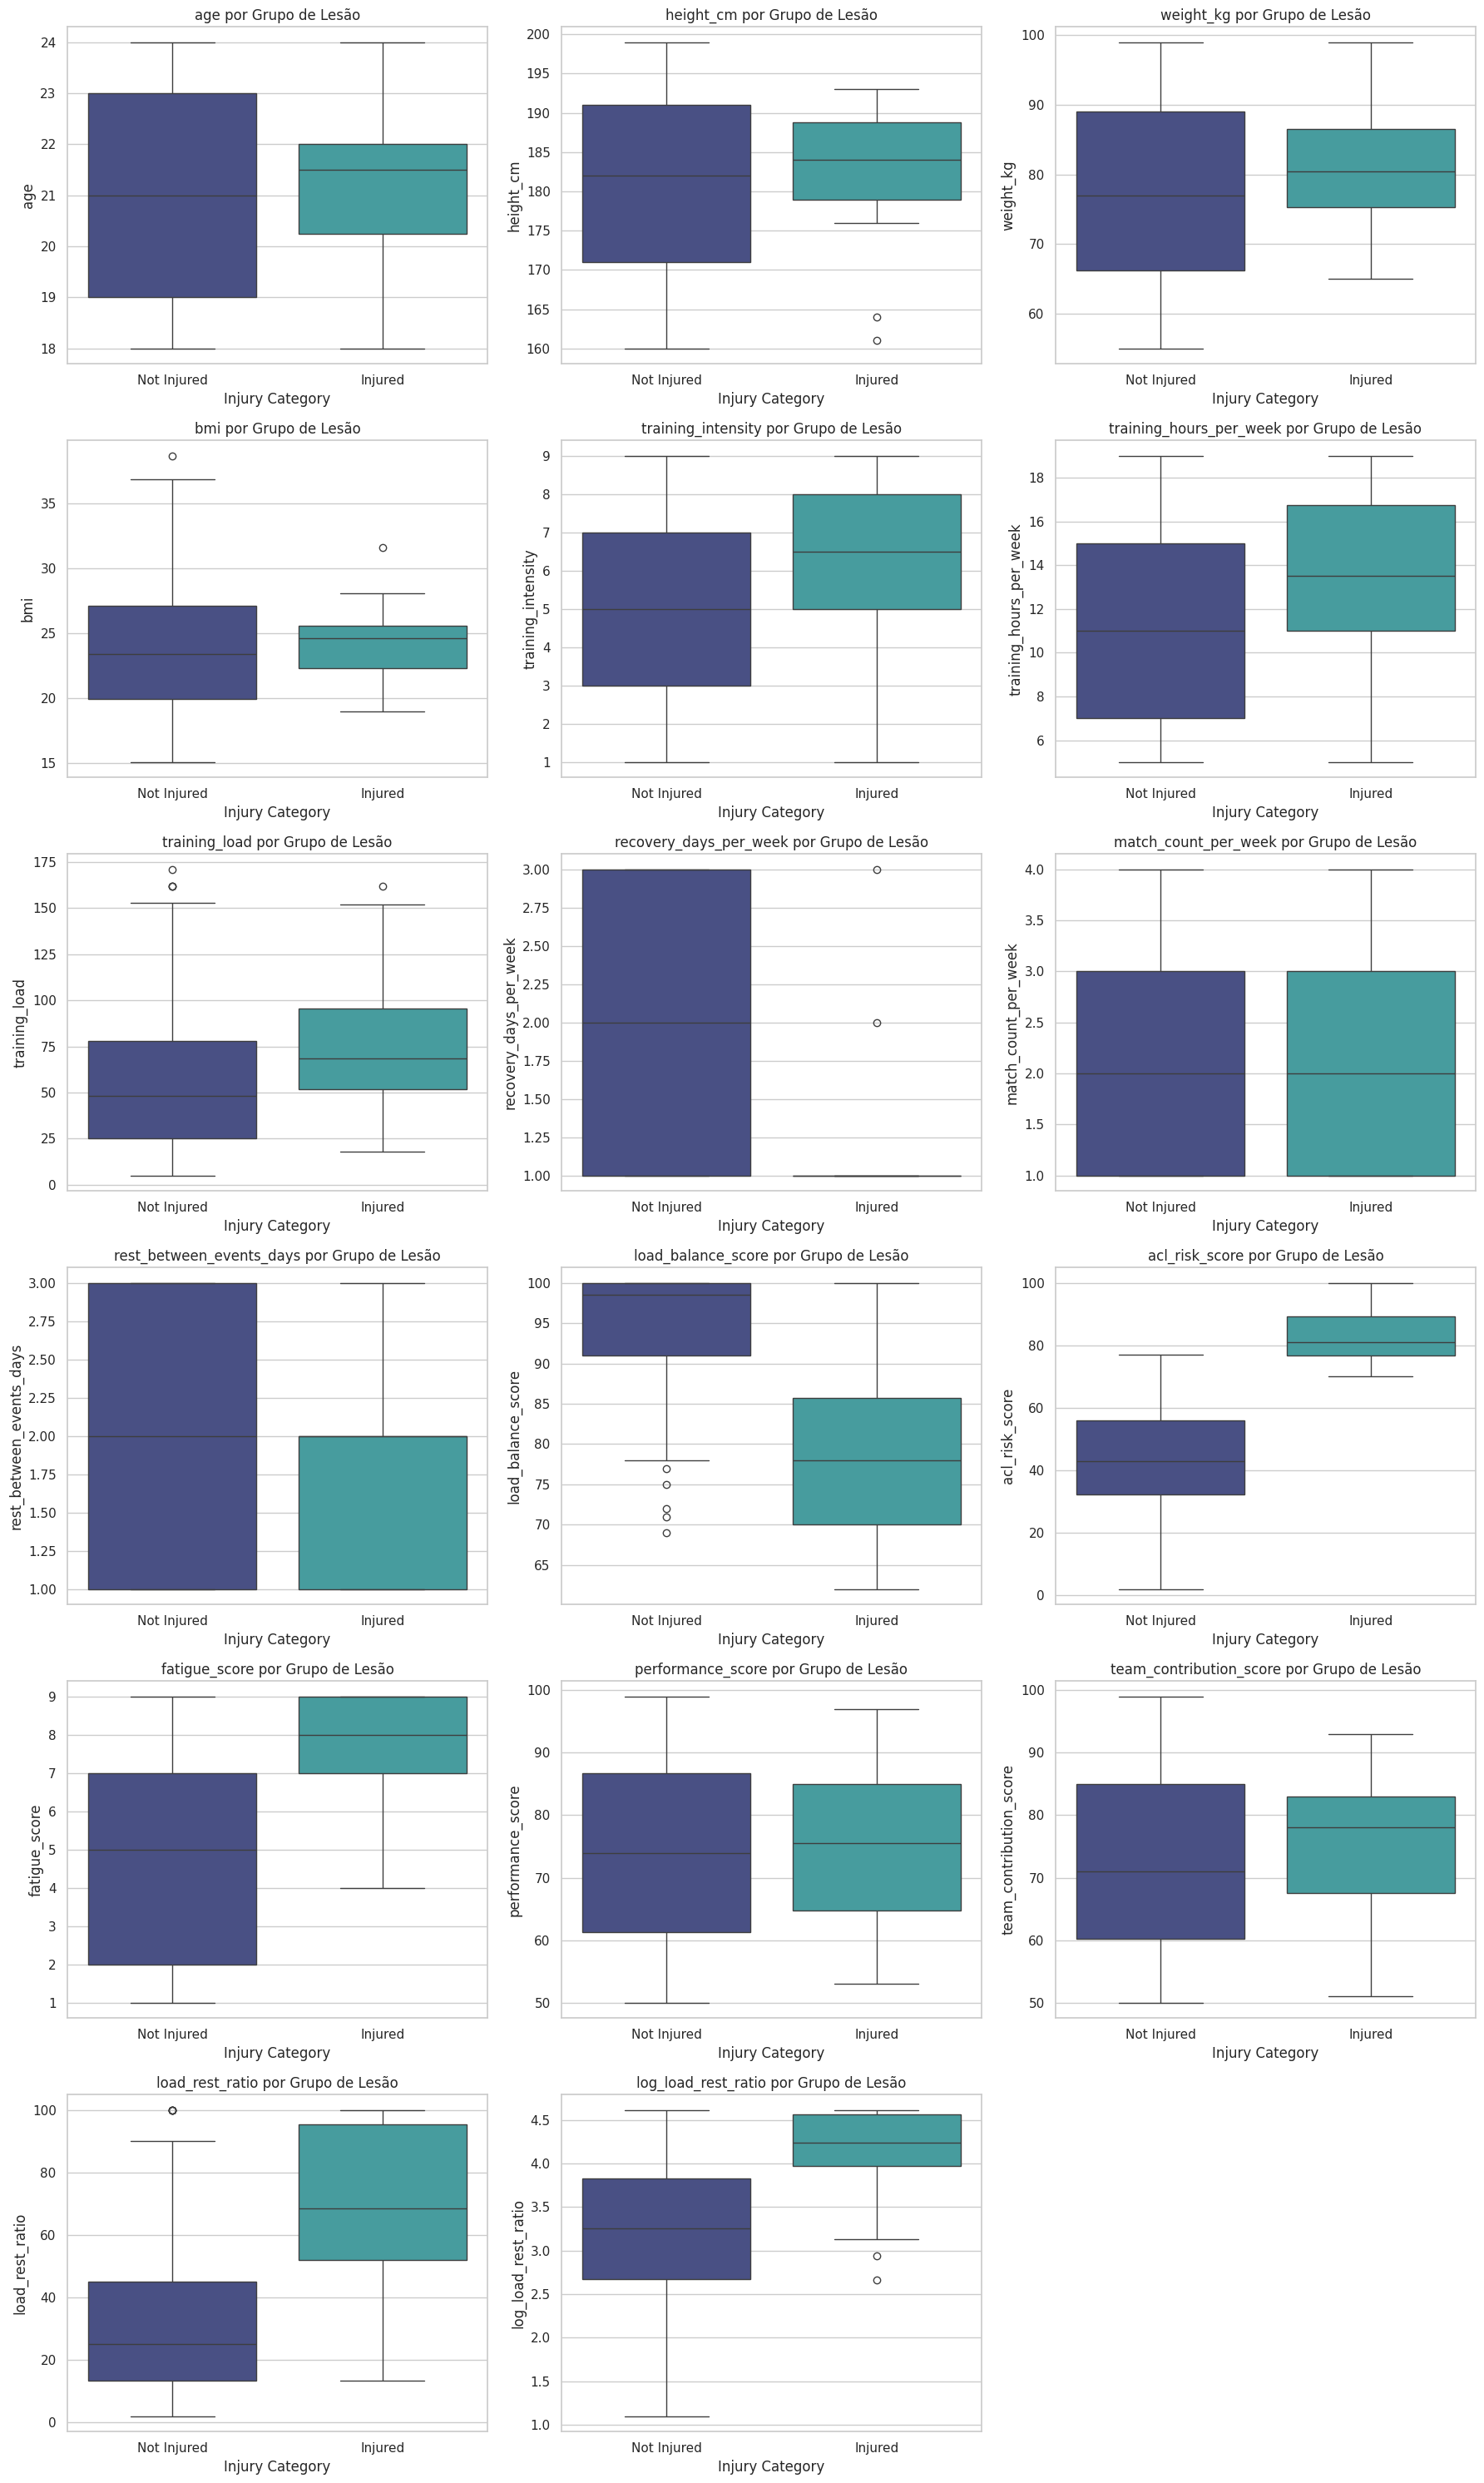

In [ ]:
# Configuração do estilo do seaborn
sns.set(style="whitegrid")

# Ajuste do layout
n_cols = 3  # quantas colunas por linha
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # calcula linhas necessárias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()  # facilita iterar sobre os eixos

# Criar boxplots em cada subplot
for ax, col in zip(axes, numerical_features):
    sns.boxplot(x="injury_category", y=col, data=df, palette="mako", ax=ax)
    ax.set_title(f"{col} por Grupo de Lesão")
    ax.set_xlabel("Injury Category")
    ax.set_ylabel(col)

# Remover eixos extras caso não tenha múltiplos exatos
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


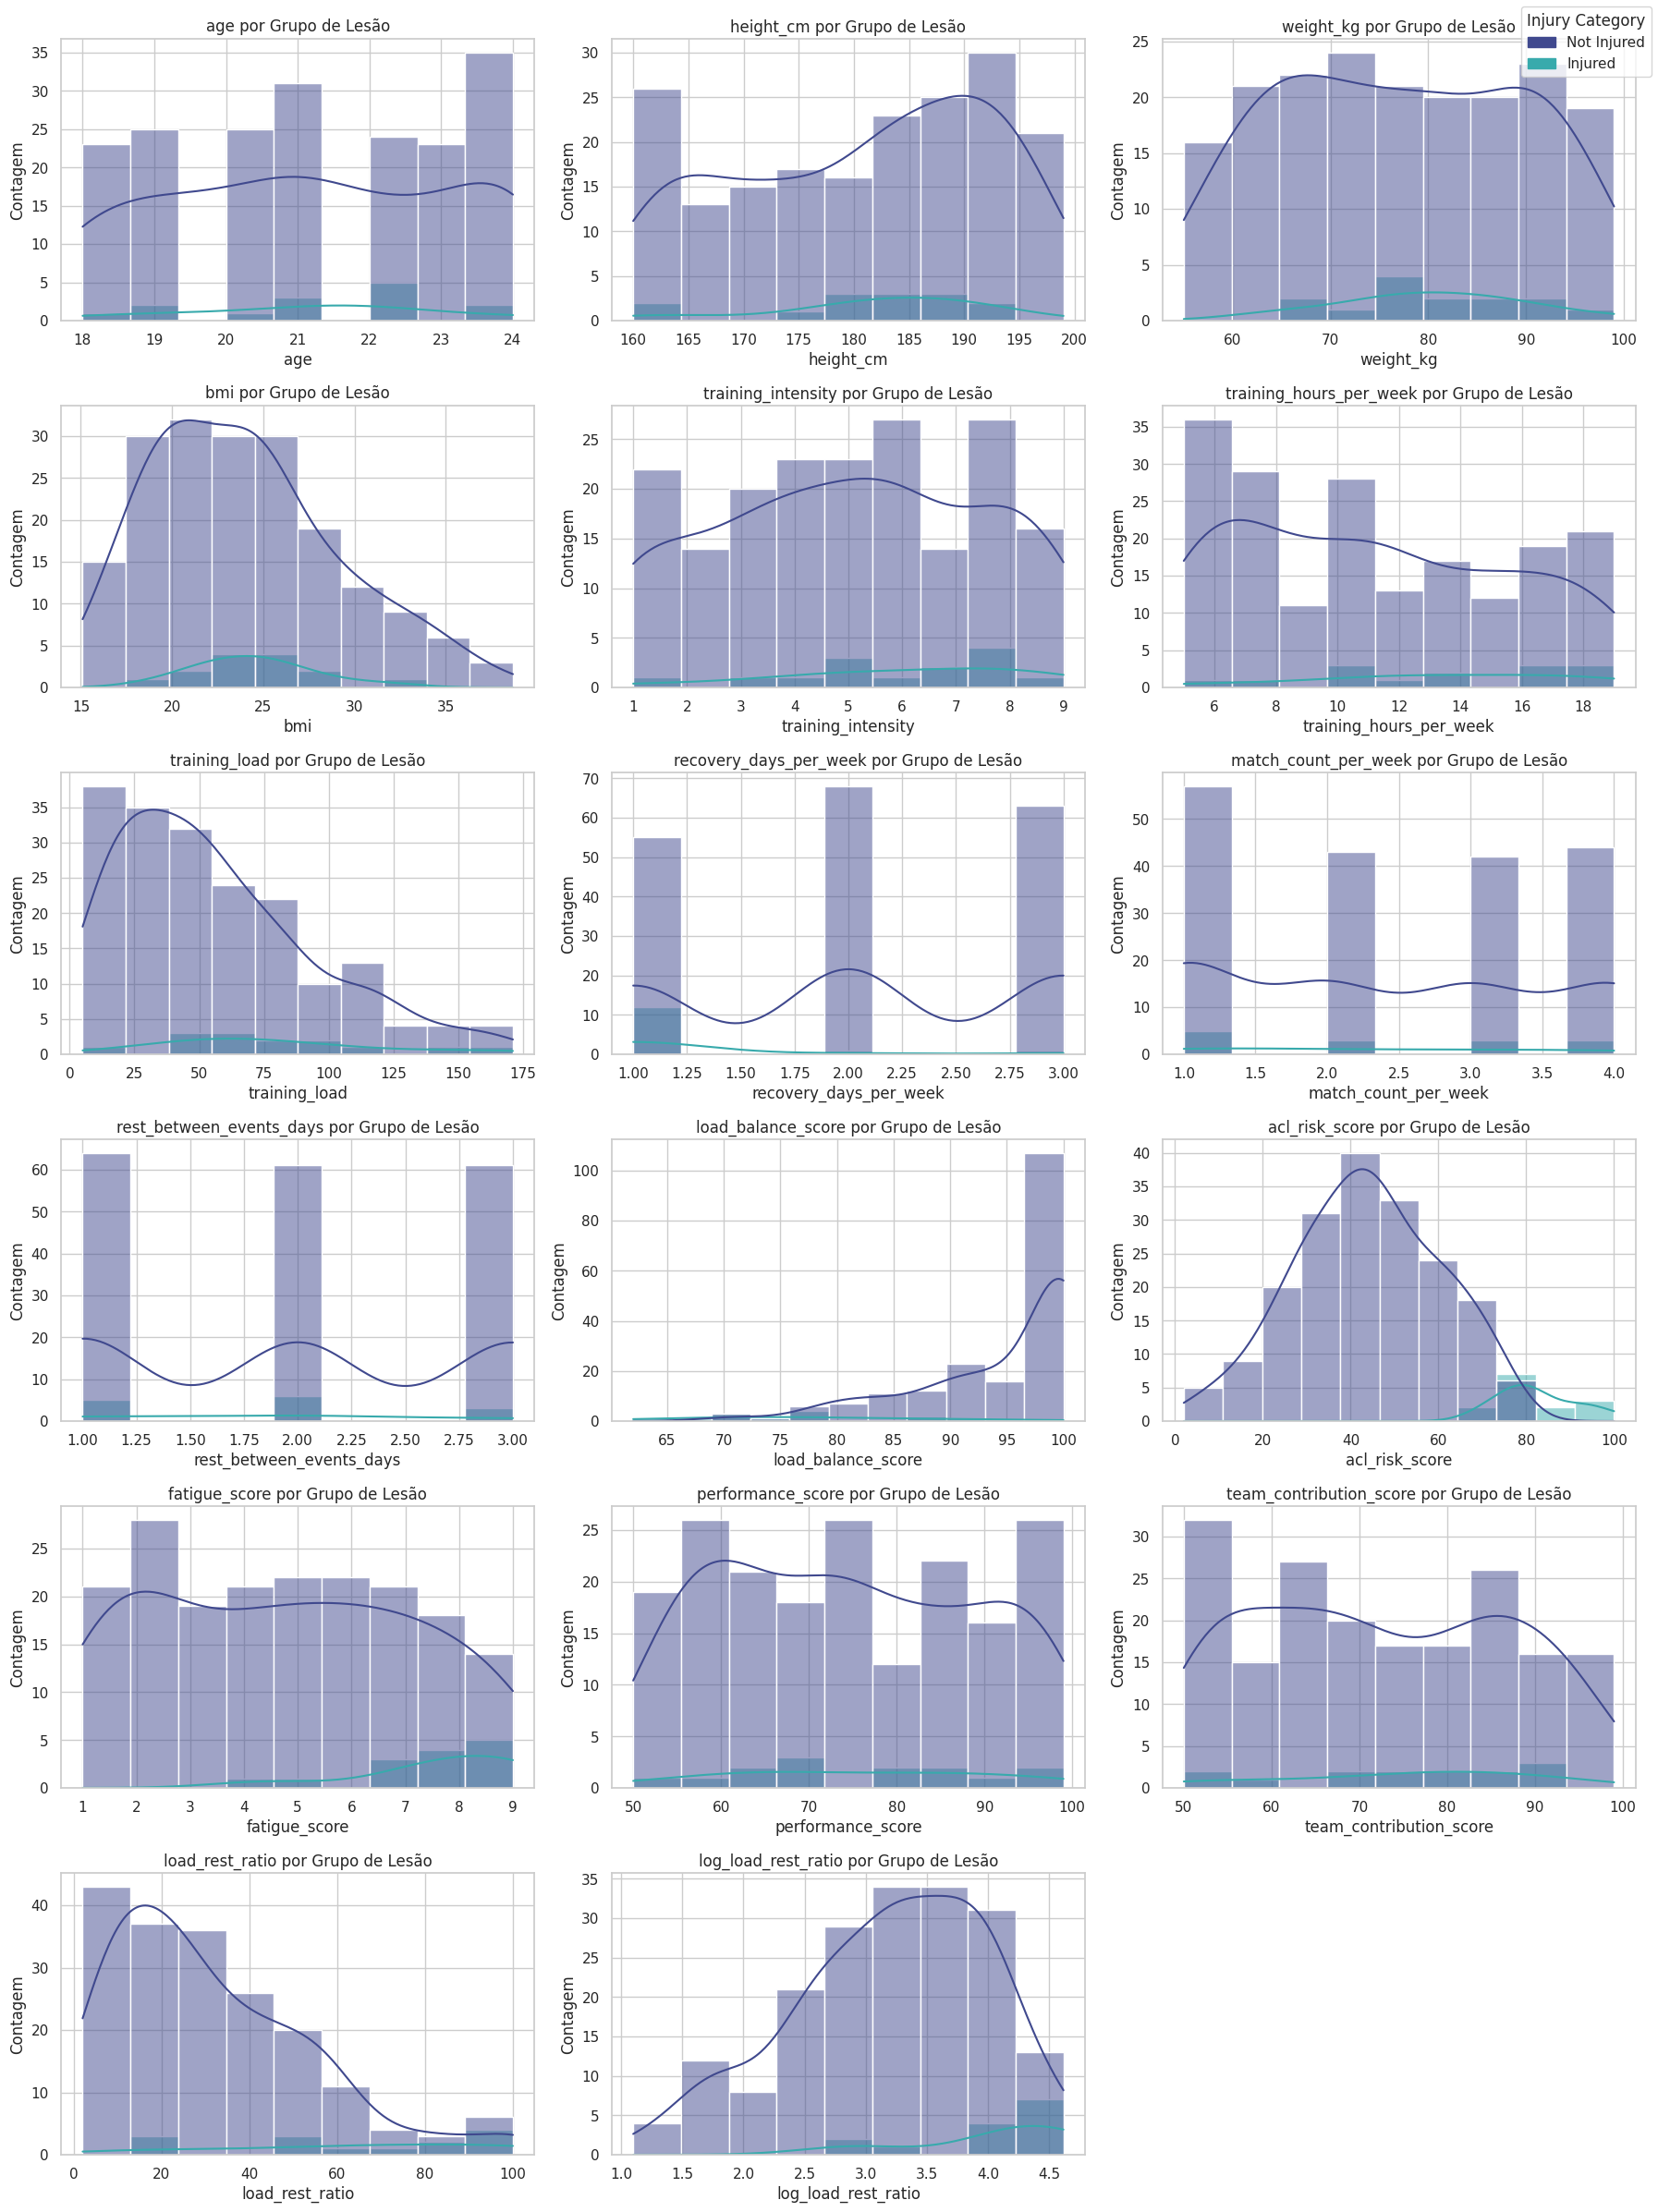

In [ ]:
sns.set(style="whitegrid")

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()

# Pegar categorias únicas e cores correspondentes da paleta
categories = df['injury_category'].unique()
palette = sns.color_palette("mako", len(categories))
color_dict = dict(zip(categories, palette))

for ax, col in zip(axes, numerical_features):
    sns.histplot(
        data=df,
        x=col,
        hue="injury_category",
        kde=True,
        palette=color_dict,
        alpha=0.5,
        ax=ax,
        legend=False  # desativa legenda automática
    )
    ax.set_title(f"{col} por Grupo de Lesão")
    ax.set_xlabel(col)
    ax.set_ylabel("Contagem")

# Criar legenda manual completa
handles = [Patch(color=color_dict[cat], label=cat) for cat in categories]
fig.legend(handles=handles, title="Injury Category", loc="upper right")

# Remove eixos extras
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Principais métricas para modelos

In [ ]:
# Define X com as variáveis explicativas
X = df[
    [
        'recovery_days_per_week',
               'load_rest_ratio',
               'load_balance_score',
               'fatigue_score',
               'training_load'
       ## 'acl_risk_score'
    ]
]

# Define y como a variável alvo
y = df['injury_indicator']


## Modelos

### Regressão Logística

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Definir modelo de regressão logística com os melhores parâmetros
logreg = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='lbfgs',
    max_iter=5000,
    random_state=42,
    class_weight='balanced'
)

# Treinar o modelo
logreg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logreg.predict(X_test)

# Avaliar desempenho
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print("Matriz de Confusão:")
print(cm)
print("Relatório de Classificação:")
print(report)

# Coeficientes do modelo ordenados por importância
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': logreg.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("Coeficientes das features (em ordem de importância):")
print(coef_df)

Acurácia: 0.88
Matriz de Confusão:
[[33  4]
 [ 1  2]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.33      0.67      0.44         3

    accuracy                           0.88        40
   macro avg       0.65      0.78      0.69        40
weighted avg       0.92      0.88      0.89        40

Coeficientes das features (em ordem de importância):
                  Feature  Coeficiente
3           fatigue_score     0.310251
2      load_balance_score    -0.121984
0  recovery_days_per_week     0.036358
1         load_rest_ratio     0.033385
4           training_load    -0.016606


In [ ]:
# Ignorar warnings de convergência apenas para deixar a saída limpa
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Parâmetros compatíveis para LogisticRegression
param_grid = {
    'solver': ['lbfgs'],    # solver estável e rápido para penalty l2
    'penalty': ['l2'],       # penalty compatível
    'C': [0.01, 0.1, 1, 10], # regularização
    'max_iter': [5000]        # garante convergência
}

# Modelo base
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Rodar busca
grid_search.fit(X_train, y_train)

# Melhor modelo
print("Melhores parâmetros:", grid_search.best_params_)
print(f"Melhor acurácia (validação cruzada): {grid_search.best_score_:.2f}")

# Avaliar no teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Acurácia no teste: {accuracy_test:.2f}")

# Mostrar coeficientes das features
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': best_model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(coef_df)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor acurácia (validação cruzada): 0.89
Acurácia no teste: 0.93
                  Feature  Coeficiente
3           fatigue_score     0.784045
0  recovery_days_per_week     0.300222
2      load_balance_score    -0.156475
1         load_rest_ratio     0.044509
4           training_load    -0.023481


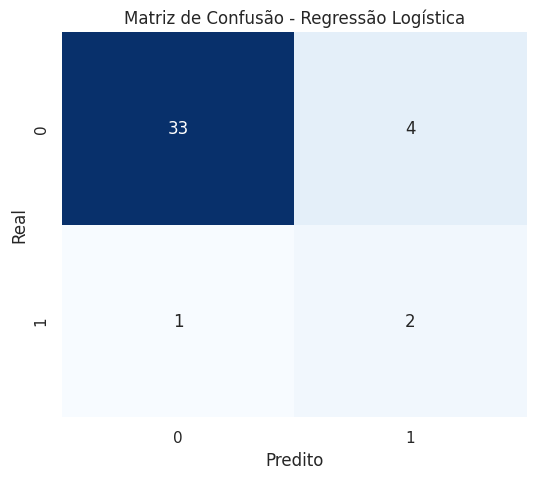

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

/tmp/ipython-input-125449852.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


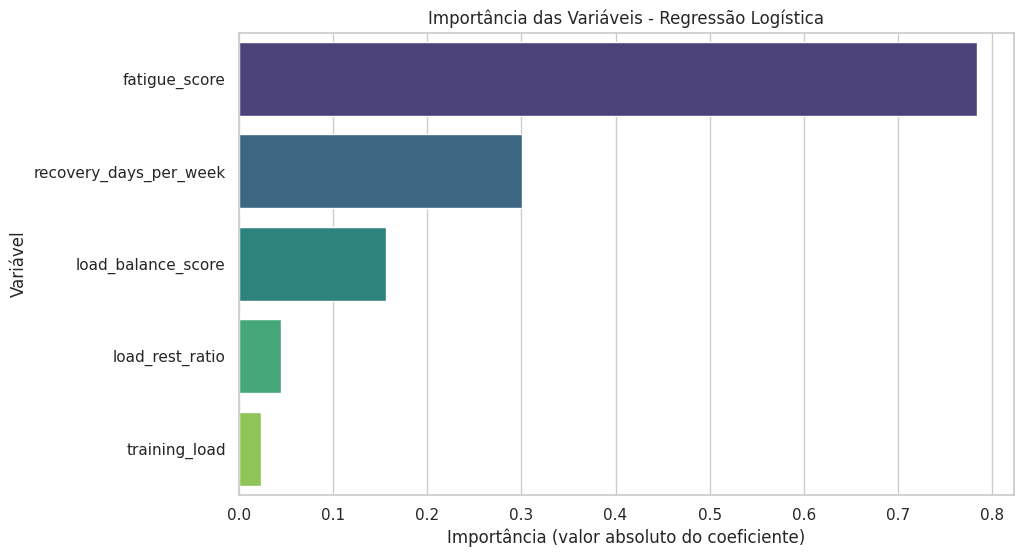

In [ ]:
# Coeficientes do modelo
importances = np.abs(best_model.coef_[0])
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Importância das Variáveis - Regressão Logística")
plt.xlabel("Importância (valor absoluto do coeficiente)")
plt.ylabel("Variável")
plt.show()

### Árvore de Decisão

In [ ]:
# Definir modelo de árvore de decisão
dtree = DecisionTreeClassifier(
    max_depth=3,      # Profundidade máxima (None = até a árvore se dividir totalmente)
    min_samples_split=2, # Número mínimo de amostras para dividir um nó
    min_samples_leaf=1,
    random_state=42,
    criterion='gini',
    class_weight='balanced'
)

# Treinar o modelo
dtree.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = dtree.predict(X_test)

# Avaliar desempenho
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f"Acurácia: {acc_tree:.2f}")
print("Matriz de Confusão:")
print(cm_tree)
print("Relatório de Classificação:")
print(report_tree)

# Importância das features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': dtree.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Importância das features (em ordem decrescente):")
print(importance_df)

Acurácia: 0.80
Matriz de Confusão:
[[29  8]
 [ 0  3]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        37
           1       0.27      1.00      0.43         3

    accuracy                           0.80        40
   macro avg       0.64      0.89      0.65        40
weighted avg       0.95      0.80      0.85        40

Importância das features (em ordem decrescente):
                  Feature  Importancia
2      load_balance_score     0.775540
3           fatigue_score     0.134908
4           training_load     0.074064
0  recovery_days_per_week     0.015489
1         load_rest_ratio     0.000000


In [ ]:
# Parâmetros para otimização da árvore de decisão
param_grid_tree = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Modelo base
dtree = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search_tree = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid_tree,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Rodar busca
grid_search_tree.fit(X_train, y_train)

# Melhor modelo
print("Melhores parâmetros:", grid_search_tree.best_params_)
print(f"Melhor acurácia (validação cruzada): {grid_search_tree.best_score_:.2f}")

# Avaliar no teste
best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
accuracy_test_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia no teste: {accuracy_test_tree:.2f}")

# Importância das features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': best_tree.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Importância das features (em ordem decrescente):")
print(importance_df)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor acurácia (validação cruzada): 0.95
Acurácia no teste: 0.93
Importância das features (em ordem decrescente):
                  Feature  Importancia
2      load_balance_score     0.800022
3           fatigue_score     0.172003
1         load_rest_ratio     0.027975
0  recovery_days_per_week     0.000000
4           training_load     0.000000


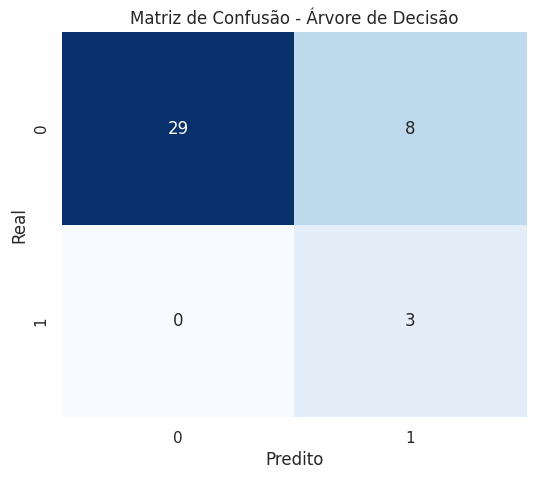

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

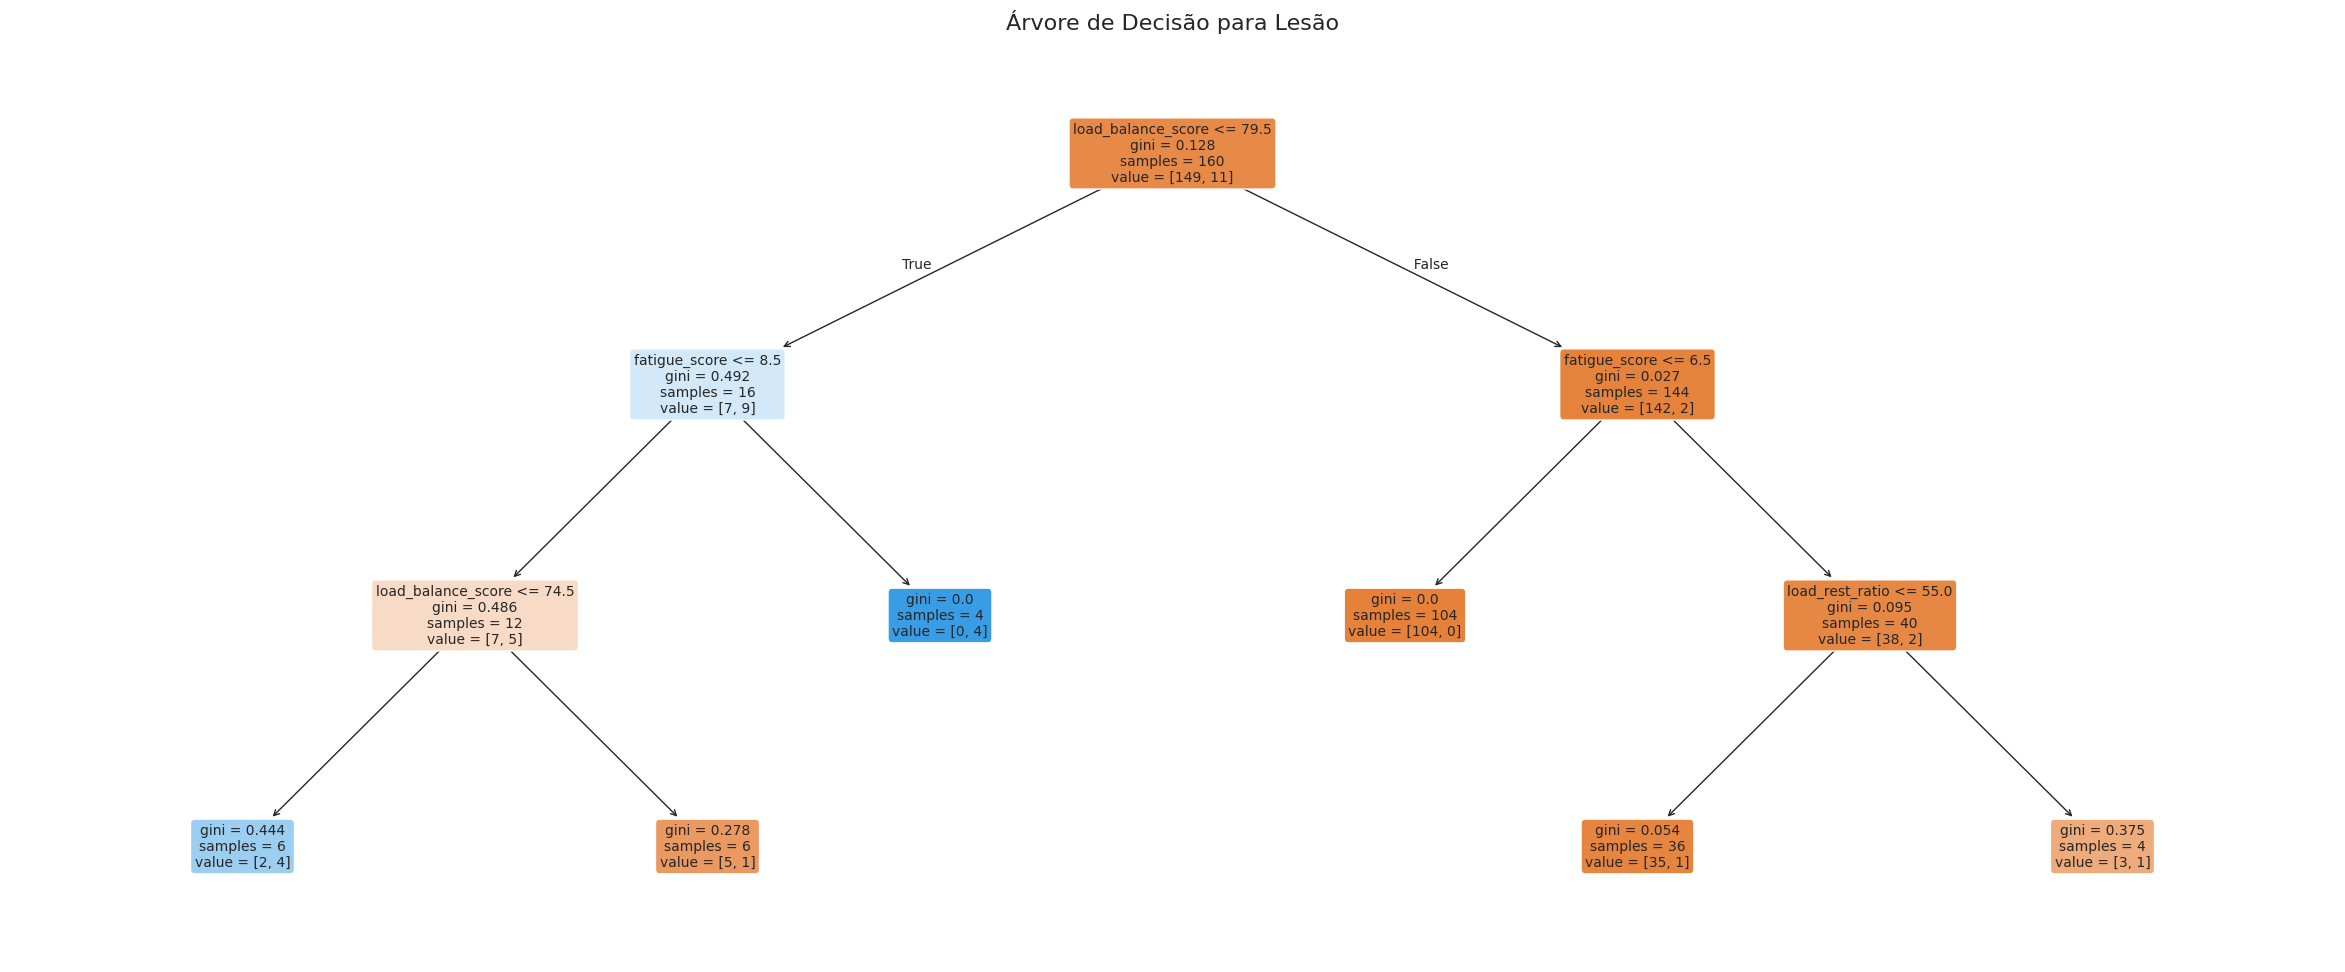

In [ ]:
plt.figure(figsize=(30, 12))

plot_tree(
    best_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Árvore de Decisão para Lesão", fontsize=16)
plt.show()


/tmp/ipython-input-3356988870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


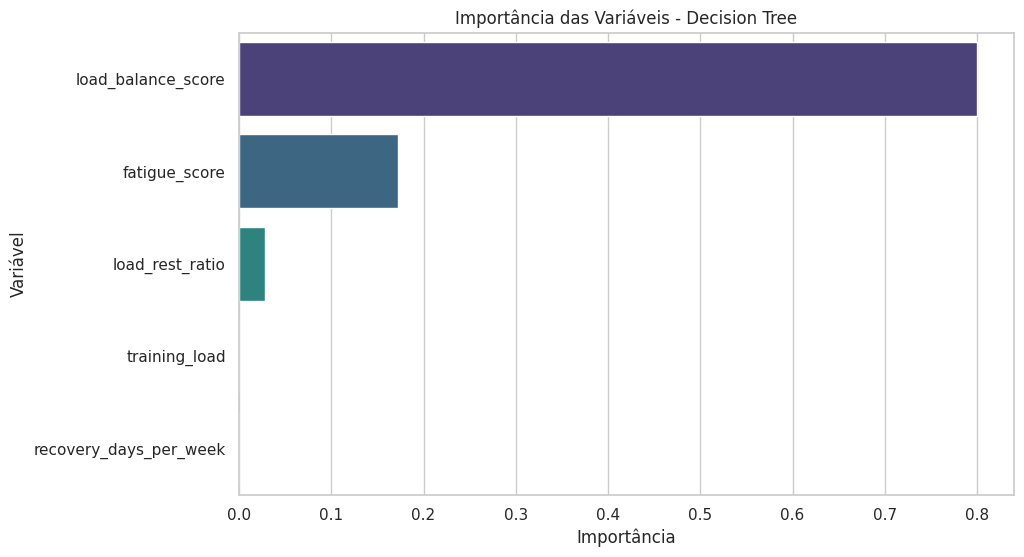

In [ ]:
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Importância das Variáveis - Decision Tree")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

### Random Forest

In [ ]:
# Definir modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       # Número de árvores na floresta
    max_depth=None,         # Profundidade máxima de cada árvore (None = até o nó puro)
    min_samples_split=2,    # Mínimo de amostras para dividir um nó
    min_samples_leaf=1,
    random_state=42,
    criterion='gini',
    n_jobs=-1,               # Usa todos os núcleos do processador
    class_weight='balanced'

)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test)

# Avaliar desempenho
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Acurácia Random Forest: {acc_rf:.2f}")
print("Matriz de Confusão:")
print(cm_rf)
print("Relatório de Classificação:")
print(report_rf)

# Importância das features
importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Importância das features (Random Forest, em ordem decrescente):")
print(importance_rf_df)


Acurácia Random Forest: 0.93
Matriz de Confusão:
[[36  1]
 [ 2  1]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.50      0.33      0.40         3

    accuracy                           0.93        40
   macro avg       0.72      0.65      0.68        40
weighted avg       0.91      0.93      0.92        40

Importância das features (Random Forest, em ordem decrescente):
                  Feature  Importancia
2      load_balance_score     0.394319
1         load_rest_ratio     0.233406
3           fatigue_score     0.156072
0  recovery_days_per_week     0.131419
4           training_load     0.084784


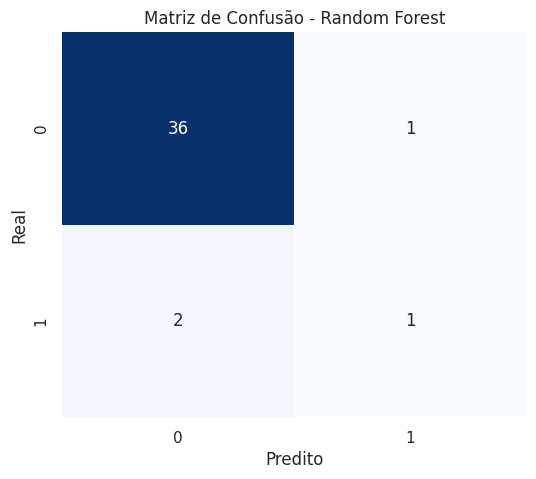

In [ ]:
# Plotar a matriz de confusão
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

/tmp/ipython-input-4135210607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


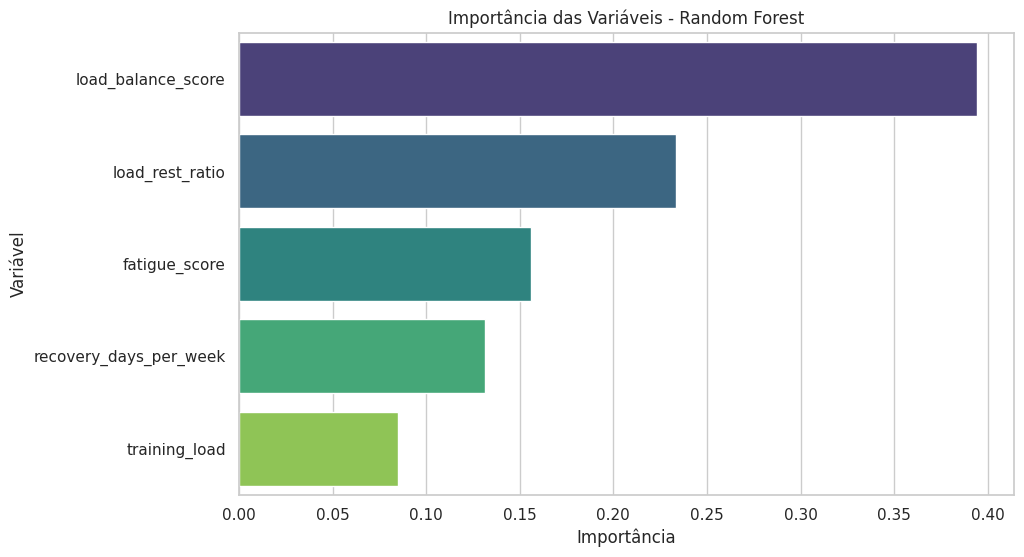

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()